In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
results = pd.read_csv('BC_final_results.csv', index_col=0)
sample_info = pd.read_csv('BC_sample_info.csv', index_col=0)

In [4]:
df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

dfm = np.log10(df + 1)

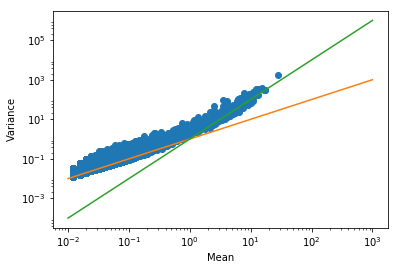

In [12]:
plt.loglog()
plt.scatter(df.mean(), df.var());
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

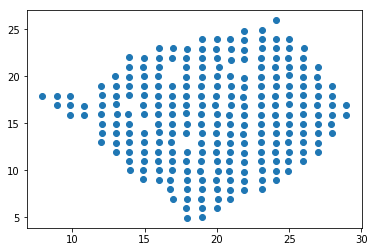

In [7]:
plt.scatter(sample_info.x, sample_info.y);

In [8]:
results.model.value_counts()

PER    8895
SE     3961
Name: model, dtype: int64

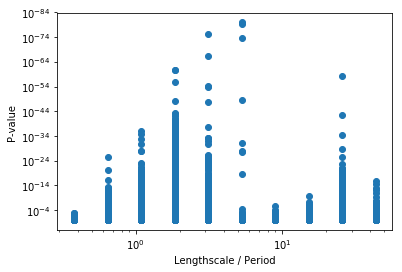

In [9]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

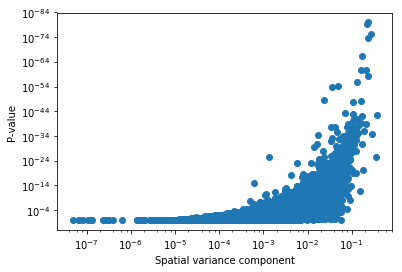

In [10]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

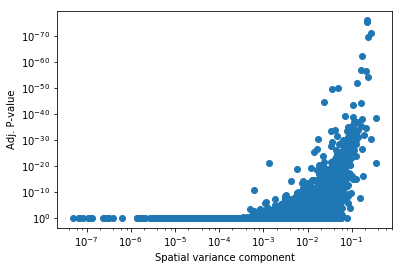

In [11]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Adj. P-value');

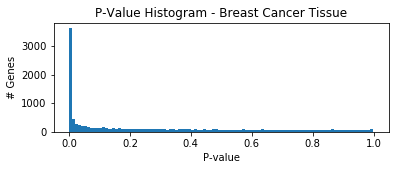

In [23]:
figsize(6, 2)
plt.hist(results.pval, bins=100);
plt.title('P-Value Histogram - Breast Cancer Tissue')
plt.ylabel('# Genes')
plt.xlabel('P-value');

plt.savefig('BC-pvalue-hist.pdf')

In [17]:
results.query('qval < 0.05').shape

(1472, 15)

In [18]:
N = 5
top_per_ls = results.query('qval < 0.05') \
                  .sort_values('qval', ascending=True) \
                  .groupby('l') \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D,pval,qval
1094,SNAP25,0.000045,495.354757,0.003957,0.001365,251,0.000322,0.641736,4,SE,-968.607703,450.460080,44.894678,4.670389e-26,6.004252e-22
196,MIEN1,0.000195,-63.275579,0.372341,0.176102,251,0.000681,0.641736,4,SE,148.652971,-99.400088,36.124508,7.200035e-21,9.256366e-17
802,HMGCS2,0.038725,170.388351,0.046612,0.018052,251,0.001403,0.641736,4,SE,-318.674891,140.787827,29.600524,5.077229e-17,6.527285e-13
419,MLF2,0.069249,-4.694086,0.195942,0.082422,251,0.001667,0.641736,4,SE,31.489984,-29.589540,24.895454,2.967632e-14,3.815188e-10
218,CST1,0.089521,53.929893,0.108048,0.045399,251,0.001159,0.641736,4,SE,-85.757975,30.056343,23.873550,1.180533e-13,1.517693e-09
1309,RPN2,0.469752,-113.307522,0.555524,0.191145,251,0.000681,1.087806,4,SE,248.716856,-176.044293,62.736771,1.211604e-36,1.557638e-32
1269,ACTB,0.395837,-62.667637,1.052054,0.280367,251,0.000508,1.087806,4,SE,147.437085,-123.208380,60.540743,2.443034e-35,3.140765e-31
1469,RTN4,0.580344,-10.168528,0.274302,0.066813,251,0.000620,1.087806,4,SE,42.438868,-67.497380,57.328852,1.973675e-33,2.537357e-29
1356,CHCHD2,0.607293,-39.263342,0.337520,0.085108,251,0.000613,1.087806,4,SE,100.628496,-93.141443,53.878101,2.205129e-31,2.834914e-27
1277,HSP90B1,0.679417,-14.774226,0.291930,0.064724,251,0.000601,1.087806,4,SE,51.650264,-64.000609,49.226383,1.266118e-28,1.627722e-24


In [19]:
top_per_ls.shape

(41, 15)

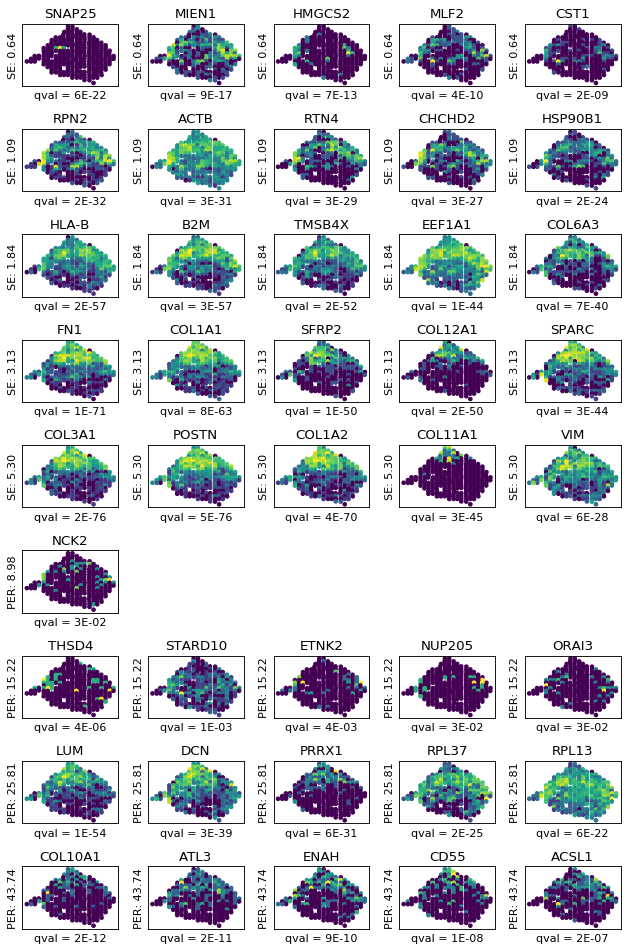

In [20]:
plt.figure(figsize=(8, 12), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=10);
        plt.title(r['g'])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('qval = {:.0E}'.format(r['qval']))
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
plt.savefig('top_BC_genes_per_ls.pdf')

In [24]:
from adjustText import adjust_text

In [25]:
N = 2
top_per_ls = results.query('qval < 0.05') \
                  .sort_values('qval', ascending=True) \
                  .groupby('l') \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])

6


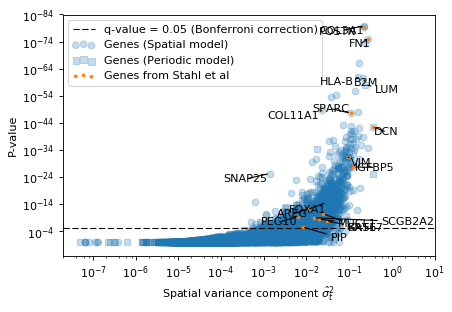

In [76]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('model == "SE"')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

tmp = results.query('model == "PER"')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Periodic model)', marker='s', color='C0');


plt.xlim(None, 1e1)

tmp = results.query('g in ["IGFBP5", "SPARC", "VIM", "FN1", "POSTN", "MUCL1", "PIP", "SCGB2A2",' \
                        '"GAS6", "KRT17", "PEG10", "AREG", "MNP14", "DCN"]')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'], s=5, zorder=10, label='Genes from Stahl et al', color='C1');

texts = []
for i in tmp.index.union(results.query('g in ["LUM", "HLA-B", "B2M", "COL3A1", "FOXA1", "SNAP25", "COL11A1"]').index):
    if results.loc[i, 'max_s2_t_hat'] == 0.:
        continue

    texts.append(plt.text(results.loc[i, 'max_s2_t_hat'], results.loc[i, 'pval'], results.loc[i, 'g']))
    
print(adjust_text(texts, arrowprops=dict(arrowstyle='-'),
                         force_points=0.1,
                         force_text=0.1,
                         force_objects=0.1,
                         zorder=20,
                         x=results['max_s2_t_hat'],
                         y=results['pval']))

    
plt.xlabel('Spatial variance component $\hat{\sigma}^2_t$');
plt.ylabel('P-value');
plt.gca().invert_yaxis()

plt.axhline(0.05 / results.shape[0], label='q-value = 0.05 (Bonferroni correction)', lw=1, linestyle='--', c='k')

plt.legend(scatterpoints=3)

plt.savefig('sigma_pval_BC.pdf', bbox_inches='tight');

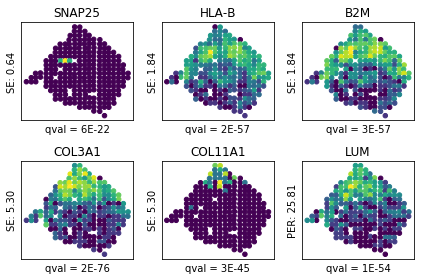

In [85]:
figsize(6, 4)
N = 3
N_rows = 2
select_genes = results.query('g in ["LUM", "HLA-B", "B2M", "COL3A1", "SNAP25", "COL11A1"]')
for i, idx in enumerate(select_genes.index):
    r = select_genes.loc[idx]
    plt.subplot(N_rows, N, i + 1)
    plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=20);
    plt.title(r['g'])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('qval = {:.0E}'.format(r['qval']))
    if True:
        plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
plt.savefig('BC_select_genes.pdf')

11


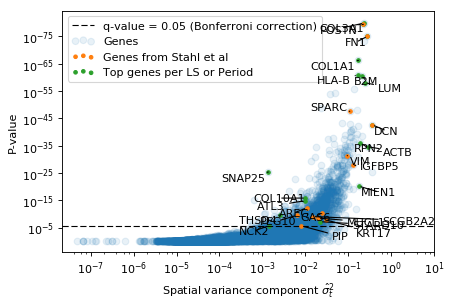

In [75]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')
plt.scatter(results['max_s2_t_hat'], results['pval'], alpha=0.1, rasterized=True, label='Genes');
plt.xlim(None, 1e1)

tmp = results.query('g in ["IGFBP5", "SPARC", "VIM", "FN1", "POSTN", "MUCL1", "PIP", "SCGB2A2",' \
                        '"GAS6", "KRT17", "PEG10", "AREG", "MNP14", "DCN"]')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'], s=10, zorder=10, label='Genes from Stahl et al');
texts = []
for i in tmp.index.union(top_per_ls.index):
    if results.loc[i, 'max_s2_t_hat'] == 0.:
        continue

    texts.append(plt.text(results.loc[i, 'max_s2_t_hat'], results.loc[i, 'pval'], results.loc[i, 'g']))
    
print(adjust_text(texts, arrowprops=dict(arrowstyle='-'),
                         force_points=0.1,
                         force_text=0.1,
                         force_objects=0.1,
                         zorder=20,
                         x=results['max_s2_t_hat'],
                         y=results['pval']))

plt.scatter(top_per_ls['max_s2_t_hat'], top_per_ls['pval'], s=10, label='Top genes per LS or Period');
    
plt.xlabel('Spatial variance component $\hat{\sigma}^2_t$');
plt.ylabel('P-value');
plt.gca().invert_yaxis()

plt.axhline(0.05 / results.shape[0], label='q-value = 0.05 (Bonferroni correction)', lw=1, linestyle='--', c='k')

plt.legend(scatterpoints=3)

plt.savefig('sigma_pval_BC_top.pdf', bbox_inches='tight');

100


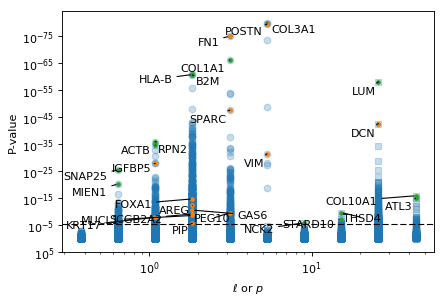

In [80]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('model == "SE"')
plt.scatter(tmp['l'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

tmp = results.query('model == "PER"')
plt.scatter(tmp['l'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Periodic model)', marker='s', color='C0');

tmp = results.query('g in ["IGFBP5", "SPARC", "VIM", "FN1", "POSTN", "MUCL1", "PIP", "SCGB2A2",' \
                        '"GAS6", "KRT17", "PEG10", "AREG", "MNP14", "DCN", "FOXA1"]')
plt.scatter(tmp['l'], tmp['pval'], s=10, zorder=10, c='C1');
texts = []
for i in tmp.index.union(top_per_ls.index):
    if results.loc[i, 'l'] == 0.:
        continue

    texts.append(plt.text(results.loc[i, 'l'], results.loc[i, 'pval'], results.loc[i, 'g']))
    
print(adjust_text(texts, arrowprops=dict(arrowstyle='-'), force_text=0.2, zorder=20))

plt.scatter(top_per_ls['l'], top_per_ls['pval'], s=10, c='C2');
    
plt.xlabel('$\ell$ or $p$');
plt.ylabel('P-value');
plt.gca().invert_yaxis()

plt.axhline(0.05 / results.shape[0], label='q-value = 0.05 (Bonferroni correction)', lw=1, linestyle='--', c='k')

plt.savefig('lp_pval_BC_top.pdf', bbox_inches='tight');

In [37]:
results.sort_values('qval', ascending=True).head(30)

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D,pval,qval
3953,COL3A1,0.365780,-63.246446,0.587125,0.227687,251,0.000671,5.298311,4,SE,148.594705,-199.793879,136.547432,1.655470e-76,2.128273e-72
3952,POSTN,0.421808,-77.201184,0.646894,0.223832,251,0.000561,5.298311,4,SE,176.504180,-213.022343,135.821159,4.263041e-76,5.480565e-72
3742,FN1,0.325519,-88.251568,0.649483,0.278097,251,0.000824,3.125663,4,SE,198.604948,-216.684902,128.433334,6.426882e-72,8.262399e-68
3955,COL1A2,0.409066,-77.794189,0.639432,0.231100,251,0.000533,5.298311,4,SE,177.690191,-203.666266,125.872076,1.804474e-70,2.319832e-66
3724,COL1A1,0.650067,-97.182794,0.776259,0.171843,251,0.000541,3.125663,4,SE,216.467400,-210.828850,113.646056,1.473494e-63,1.894324e-59
2350,HLA-B,0.468063,-64.157268,0.706347,0.163854,251,0.000636,1.843940,4,SE,150.416348,-168.726459,104.569191,1.986017e-58,2.553223e-54
2544,B2M,0.580367,-114.089942,0.827401,0.208892,251,0.001188,1.843940,4,SE,250.281696,-218.297347,104.207405,3.179803e-58,4.087955e-54
9956,LUM,1.316644,-40.928501,0.513739,0.239233,251,0.000569,25.806160,4,PER,103.958813,-140.889694,99.961193,7.968179e-56,1.024389e-51
2472,TMSB4X,0.497420,-49.762505,0.594316,0.134381,251,0.000563,1.843940,4,SE,121.626822,-146.051522,96.289017,9.454045e-54,1.215412e-49
3761,SFRP2,0.897369,13.057572,0.224819,0.049123,251,0.000536,3.125663,4,SE,-4.013333,-80.262188,93.319760,4.493066e-52,5.776286e-48
